<a href="https://colab.research.google.com/github/nahu9815/inteligencia_artificial/blob/main/Chest_Xray_VGG16%2050epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator 
# https://keras.io/api/preprocessing/image/#image-data-preprocessing
from keras.applications.imagenet_utils import preprocess_input

from keras.applications.vgg16 import VGG16

from keras.models import Model

from keras.layers import Dense, Flatten

from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import accuracy

import matplotlib.pyplot as plt
#!pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pathTrain = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/train/'
pathTest = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/test/'

if (os.path.exists(pathTrain) and os.path.exists(pathTest)):
    print('OK')
else:
    print('No existen carpetas')
    print('Descomprima el archivo catdog.zip o puede descargar otro dataset: https://www.kaggle.com/arpitjain007/dog-vs-cat-fastai')

OK


In [4]:
images_increased = 5
width_shape = 224
height_shape = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=20, # rota 20 grados
    zoom_range=0.2, # zoom
    width_shift_range=0.1, # desplazar 10%
    height_shift_range=0.1,  # desplazar 10%
    horizontal_flip=True, # invertir horizontalmente
    vertical_flip=False,
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    pathTrain,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(  
    pathTest,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
inputShape = (height_shape, width_shape, 3)


model = VGG16(include_top=False, weights="imagenet", input_shape=inputShape)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
def load_fc_layers(model):
    
    # add new classifier layers
    flat = Flatten()(model.layers[-1].output)
    dense = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=model.inputs, outputs=output)
    
    return model

In [7]:
fullModel = load_fc_layers(model)
fullModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
adam = Adam(learning_rate=0.001)

fullModel.compile(
    optimizer=adam,
    loss=binary_crossentropy,
    metrics=[accuracy]
)

In [9]:
epoch = 50

history = fullModel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epoch
)

Epoch 1/50
164/164 [==============================] - 1008s 6s/step - loss: 33.4202 - accuracy: 0.0742 - val_loss: 0.7109 - val_accuracy: 0.0000e+00
Epoch 2/50
164/164 [==============================] - 137s 837ms/step - loss: 0.3697 - accuracy: 6.6517e-05 - val_loss: 0.4759 - val_accuracy: 0.0000e+00
Epoch 3/50
164/164 [==============================] - 138s 841ms/step - loss: 0.4013 - accuracy: 0.0027 - val_loss: 0.6631 - val_accuracy: 0.0000e+00
Epoch 4/50
164/164 [==============================] - 136s 828ms/step - loss: 0.5874 - accuracy: 0.0000e+00 - val_loss: 0.6848 - val_accuracy: 0.0000e+00
Epoch 5/50
164/164 [==============================] - 135s 822ms/step - loss: 0.5668 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 6/50
164/164 [==============================] - 134s 818ms/step - loss: 0.5744 - accuracy: 0.0000e+00 - val_loss: 0.6957 - val_accuracy: 0.0000e+00
Epoch 7/50
164/164 [==============================] - 133s 811ms/step - loss: 0.5715 

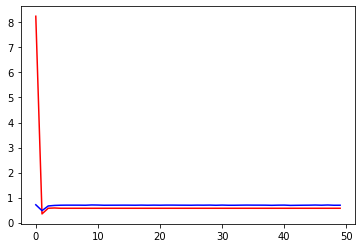

In [10]:
history.history
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='red')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='blue')

plt.show()